In [34]:
from scipy.io import loadmat


data = loadmat("S1_20140620T021349.mat")['data_EMG']
data = data.swapaxes(0, 2)
# [trials, channels, samples]
print(data.shape)

from scipy.signal import resample
dt = resample(data[1,1,:], 1000)
print(dt.shape)

(189, 6, 20000)
(1000,)


In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from scipy.signal import resample


d = list()
for e in range(6):
    # distribuindo os 20.000 dados em 5 segundos
    for i, t in enumerate(np.linspace(0, 5, 20000)):
        # testando a 1ª amostra das 189 disponíveis (0)
        d.append([e, t, data[1][e][i]])
d = np.array(d)
print(d.shape)

d = resample(d, 1000)
print(d.shape)

x, y, z = d[:,0], d[:,1], d[:,2]
print(x.shape, y.shape)

(120000, 3)
(1000, 3)
(1000,) (1000,)


TypeError: Object of type ndarray is not JSON serializable

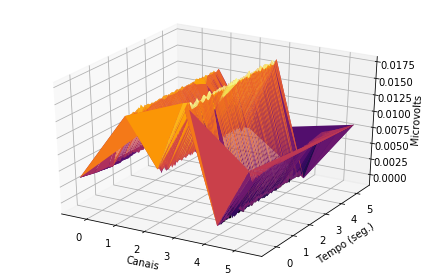

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(x, y, z, cmap=cm.inferno, linewidth=1)
ax.set_xlabel('Canais')
ax.set_ylabel('Tempo (seg.)')
ax.set_zlabel('Microvolts')
#fig.colorbar(surf)
fig.tight_layout()
plt.show()